In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger('matplotlib.mathtext').setLevel(logging.WARNING)

import sys, os
sys.path.append(os.path.abspath('..'))

import matplotlib.pyplot as plt

from models.sbbts_uni_fft import *
from models.sbbts_uni_kernel import *
from utils.data_generation import *
from utils.eval_functions import *

In [36]:
M, N_pi = 100, 100
N = 100
Generator_garch = Generate_Data(M)
X_garch = Generator_garch.generate_GARCH(N=N)

deltati = 1
grid = np.linspace(X_garch.min() - 2 * X_garch.std(), X_garch.max() + 2 * X_garch.std(), 1000)

X_garch_sbts = simusbbts_kernel(N=N, M=M, X=X_garch, N_pi=N_pi, h=.8,
                         deltati=deltati, grid=grid, K=50, beta=300, M_simu=10)

X_garch = X_garch[:, 1:]

Start time: 11:24:14
Expected finish time: 11:29:39
Finish time: 11:28:54
Time to generate 10 samples with N_pi=100: 279 seconds.


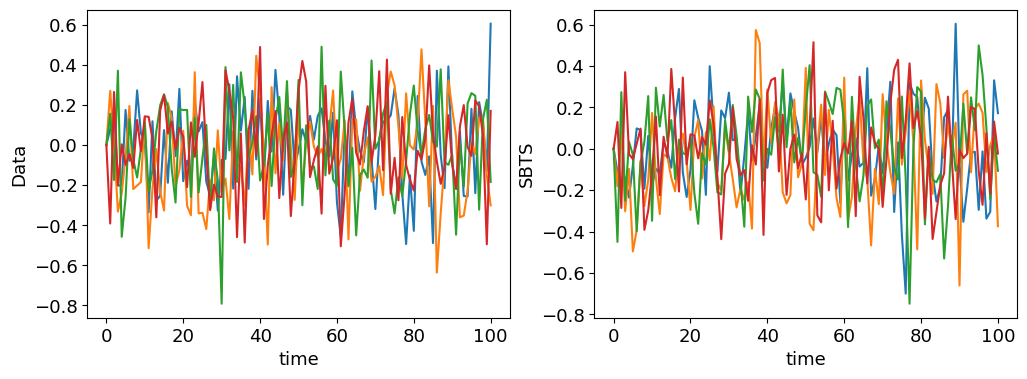

In [37]:
plot_sample(X_garch, X_garch_sbts)